In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

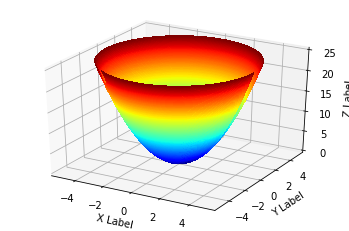

In [ ]:
#Create the image of a paraboloid with one axis scaled (like an oval paraboloid).
radius = 5
hole_radius = 0
r = np.linspace(0,radius,1000)
theta = np.linspace(0,2*np.pi,1000)
R,THETA = np.meshgrid(r,theta)
X,Y = R*np.cos(THETA),R*np.sin(THETA)
Z1 = (X)**2 + (Y)**2
x = np.where(X**2+Y**2<=hole_radius**2,np.NAN,X)
y = np.where(X**2+Y**2<=hole_radius**2,np.NAN,Y)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_facecolor("white")
ax.plot_surface(x,y,Z1,cmap=cm.jet,linewidth=0,antialiased=True,cstride=2,rstride=2,)
ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_zlabel("Z Label")
plt.savefig("paraboloid.png")

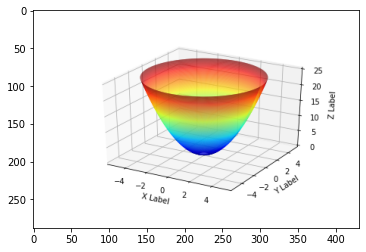

In [ ]:
img = cv2.imread("paraboloid.png")
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.imshow(img)

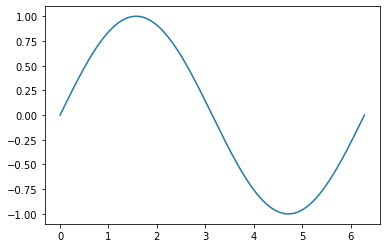

In [ ]:
#Create the image of a rotated sin using rotation of coordinates.
x = np.linspace(0,2*np.pi,1000)
y = np.sin(x)
plt.plot(x,y)
plt.savefig("sin.png")


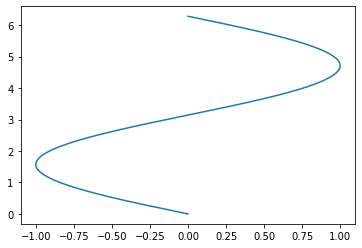

In [ ]:
theta = np.radians(90)
RM = np.array([np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)])
topltx = np.array([])
toplty = np.array([])
for i in range(1000):
  rpi = np.dot([x[i],y[i]],RM)
  topltx = np.append(topltx,rpi[0])
  toplty = np.append(toplty,rpi[1])
plt.plot(topltx,toplty)

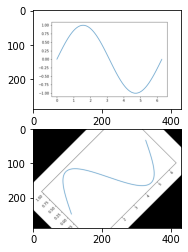

In [ ]:
degrees = 90
img = cv2.imread("sin.png")
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
h,w = img.shape[:2]
cX,cY = (w//2,h//2)
RM = cv2.getRotationMatrix2D((cX,cY),degrees,1.0)
rotatedimg = cv2.warpAffine(img,RM,(w,h))
plt.subplot(2,1,1)
plt.imshow(img)
plt.subplot(2,1,2)
plt.imshow(rotatedimg)


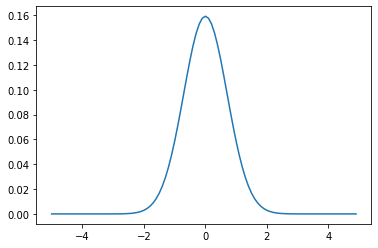

In [ ]:
#Create the image of a gaussian.
def gauss2d(x=0,y=0,mx=0,my=0,sx=1,sy=1):
  return 1./(2. * np.pi*sx*sy)*np.exp(-((x-mx)**2. / (2.*sx**2)+(y-my)**2. / (2.*sy**2.)))

x = np.arange(-5,5,.1)
y = np.arange(-5,5,.1)
plt.plot(x,gauss2d(x,y))

Pls type theta(degrees) 180
Type mx 0
Type my 0
Type sx 1
Type sy 1


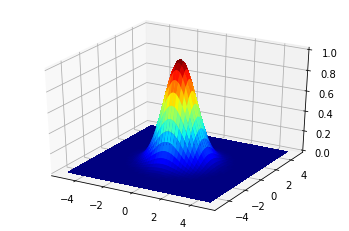

In [ ]:
#Create a function that generates the image of a Gaussian optionally rotate by an angle \theta and with mx, my, sx, sy as input arguments.

theta = np.radians(float(input("Pls type theta(degrees) ")))
#RM = np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
mx,my = (float(input("Type mx ")),float(input("Type my ")))
sx,sy = (float(input("Type sx ")),float(input("Type sy ")))
A = 1;

[X, Y] = np.meshgrid(np.arange(-5,5,.1),np.arange(-5,5,.1));
lins = np.linspace(0,theta,100)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_facecolor("white")
for itheta in lins:
  a = np.cos(itheta)**2 / (2 * sx**2) + np.sin(itheta)**2 / (2 * sy**2)
  b = -np.sin(2 * itheta) / (4 * sx**2) + np.sin(2 * itheta) / (4 * sy**2)
  c = np.sin(itheta)**2 / (2 * sx**2) + np.cos(itheta)**2 / (2 * sy**2)

  Z = A * np.exp(-(a * (X - mx)**2 + 2 * b * (X - mx) * (Y - my) + c * (Y - my)**2))
  ax.plot_surface(X,Y,Z,cmap=cm.jet,linewidth=0,antialiased=True,cstride=2,rstride=2)
plt.show()

In [ ]:
from google.colab import files
!rm *

rm: cannot remove 'sample_data': Is a directory
